In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
path =r'C:\Users\João Pedro\EXERCISES EXAMPLE PYTHON\World Happiness Report'

In [4]:
df_report = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_years.csv'), sep=';' , index_col = False)

In [5]:
df_report.head()

,Country,Year,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity,Region,Dystopia Residual,Standard Error,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Western Europe,2.51738,0.03411,NaN,NaN,NaN,NaN
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Western Europe,2.70201,0.04884,NaN,NaN,NaN,NaN
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Western Europe,2.49204,0.03328,NaN,NaN,NaN,NaN
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Western Europe,2.46531,0.03880,NaN,NaN,NaN,NaN
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,North America,2.45176,0.03553,NaN,NaN,NaN,NaN


In [6]:
df_report.count()

Country                      782
Year                         782
Happiness_Rank               782
Happiness_Score              782
GDP_Capita                   782
Family                       782
Life_Expectancy              782
Freedom                      782
Gov_Trust                    781
Generosity                   782
Region                       315
Dystopia Residual            470
Standard Error               158
Lower Confidence Interval    157
Upper Confidence Interval    157
Whisker.high                 155
Whisker.low                  155
dtype: int64

In [7]:
df_report.shape

(782, 17)

In [8]:
df_report.columns

Index(['Country', 'Year', 'Happiness_Rank', 'Happiness_Score', 'GDP_Capita',
       'Family', 'Life_Expectancy', 'Freedom', 'Gov_Trust', 'Generosity',
       'Region', 'Dystopia Residual', 'Standard Error',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Whisker.high', 'Whisker.low'],
      dtype='object')

# CREATE A SUBSET


In [20]:
report_sub = df_report[['Happiness_Rank','Happiness_Score', 'GDP_Capita', 'Family', 'Life_Expectancy', 'Freedom', 'Gov_Trust', 'Generosity']]

In [21]:
report_sub

,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
777,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
778,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
779,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
780,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


# Create correlation table

In [22]:
report_sub.corr()

,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity
Happiness_Rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.372781,-0.117713
Happiness_Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.398418,0.137578
GDP_Capita,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.306307,-0.014560
Family,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.126401,-0.037262
Life_Expectancy,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.250512,0.010638
Freedom,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.459593,0.290706
Gov_Trust,-0.372781,0.398418,0.306307,0.126401,0.250512,0.459593,1.000000,0.318920
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318920,1.000000


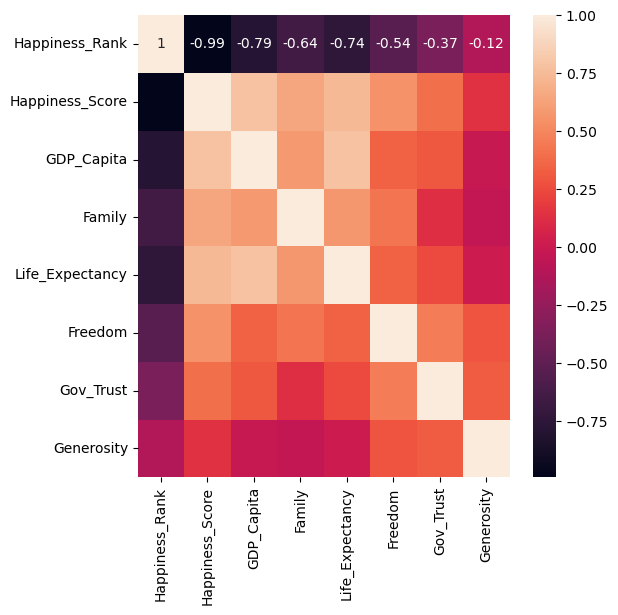

In [29]:
f,ax = plt.subplots(figsize=(6,6))
corr = sns.heatmap(report_sub.corr(), annot = True, ax = ax)

In [30]:
plt.savefig('heatmap.png')

<Figure size 640x480 with 0 Axes>